# Exemple RandomForest avec dataset Titanic

Usage du dataset *titanic* pour illustrer l'usage des ***Random Forest***.


In [22]:
import pandas as pnd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier


## Lecture et Cleaning

Première étape : lecture du dataset et nettoyage des données. 

In [23]:
titanic = pnd.read_csv('TitanicSurvival.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1309 non-null   object 
 1   survived        1309 non-null   object 
 2   sex             1309 non-null   object 
 3   age             1046 non-null   float64
 4   passengerClass  1309 non-null   object 
dtypes: float64(1), object(4)
memory usage: 51.3+ KB


In [24]:
titanic.head(15)

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st
5,"Anderson, Mr. Harry",yes,male,48.00,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.00,1st
7,"Andrews, Mr. Thomas Jr",no,male,39.00,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.00,1st
9,"Artagaveytia, Mr. Ramon",no,male,71.00,1st


On va réduire la précision (pour mieux visualiser l'age) et renomer la première colonne. 

In [25]:
pnd.set_option('precision', 2)
titanic.rename(columns={'Unnamed: 0':'passenger'}, inplace=True)
titanic.head(10)

,passenger,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st
5,"Anderson, Mr. Harry",yes,male,48.00,1st
6,"Andrews, Miss. Kornelia Theodos",yes,female,63.00,1st
7,"Andrews, Mr. Thomas Jr",no,male,39.00,1st
8,"Appleton, Mrs. Edward Dale (Cha",yes,female,53.00,1st
9,"Artagaveytia, Mr. Ramon",no,male,71.00,1st


maintenant, on peut remplir les ages NA avec l'age moyenne (on aurait pu les supprimer aussi). 

In [26]:
titanic.describe()

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [28]:
titanic['age'].fillna (titanic['age'].mean(),inplace=True)
titanic['age'].describe()

count    1309.00
mean       29.88
std        12.88
min         0.17
25%        22.00
50%        29.88
75%        35.00
max        80.00
Name: age, dtype: float64

On va transformer les valeurs texte des colonnes survived, sex et passenferclass en valeurs numériques. 

In [29]:
titanic = pnd.get_dummies (titanic, columns=['survived','sex'], drop_first=True)
titanic.head(10)

,passenger,age,passengerClass,survived_yes,sex_male
0,"Allen, Miss. Elisabeth Walton",29.00,1st,1,0
1,"Allison, Master. Hudson Trevor",0.92,1st,1,1
2,"Allison, Miss. Helen Loraine",2.00,1st,0,0
3,"Allison, Mr. Hudson Joshua Crei",30.00,1st,0,1
4,"Allison, Mrs. Hudson J C (Bessi",25.00,1st,0,0
5,"Anderson, Mr. Harry",48.00,1st,1,1
6,"Andrews, Miss. Kornelia Theodos",63.00,1st,1,0
7,"Andrews, Mr. Thomas Jr",39.00,1st,0,1
8,"Appleton, Mrs. Edward Dale (Cha",53.00,1st,1,0
9,"Artagaveytia, Mr. Ramon",71.00,1st,0,1


In [30]:
titanic = pnd.get_dummies (titanic, columns=['passengerClass'])
titanic.sample(15)

,passenger,age,survived_yes,sex_male,passengerClass_1st,passengerClass_2nd,passengerClass_3rd
224,"Partner, Mr. Austen",45.50,0,1,1,0,0
1090,"Oreskovic, Miss. Jelka",23.00,0,0,0,0,1
1144,"Rice, Master. Eugene",2.00,0,1,0,0,1
1097,"Palsson, Master. Paul Folke",6.00,0,1,0,0,1
861,"Heininen, Miss. Wendla Maria",23.00,0,0,0,0,1
913,"Karlsson, Mr. Einar Gervasius",21.00,1,1,0,0,1
1028,"Moran, Miss. Bertha",29.88,1,0,0,0,1
285,"Straus, Mr. Isidor",67.00,0,1,1,0,0
591,"West, Miss. Constance Mirium",5.00,1,0,0,1,0
673,"Betros, Mr. Tannous",20.00,0,1,0,0,1


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger           1309 non-null   object 
 1   age                 1309 non-null   float64
 2   survived_yes        1309 non-null   uint8  
 3   sex_male            1309 non-null   uint8  
 4   passengerClass_1st  1309 non-null   uint8  
 5   passengerClass_2nd  1309 non-null   uint8  
 6   passengerClass_3rd  1309 non-null   uint8  
dtypes: float64(1), object(1), uint8(5)
memory usage: 27.0+ KB


## Séparation X & Y, Training & Test
Sélection des features et séparation de notre dataset en test et training. 

In [32]:
train_titanic, test_titanic = train_test_split (titanic, test_size=0.3)
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 966 to 773
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   passenger           916 non-null    object 
 1   age                 916 non-null    float64
 2   survived_yes        916 non-null    uint8  
 3   sex_male            916 non-null    uint8  
 4   passengerClass_1st  916 non-null    uint8  
 5   passengerClass_2nd  916 non-null    uint8  
 6   passengerClass_3rd  916 non-null    uint8  
dtypes: float64(1), object(1), uint8(5)
memory usage: 25.9+ KB


In [33]:
features_names = ['age','sex_male','passengerClass_1st','passengerClass_2nd','passengerClass_3rd']
features_names

['age',
 'sex_male',
 'passengerClass_1st',
 'passengerClass_2nd',
 'passengerClass_3rd']

In [36]:
X_train = train_titanic[features_names]
X_test = test_titanic[features_names]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 1273 to 629
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 393 non-null    float64
 1   sex_male            393 non-null    uint8  
 2   passengerClass_1st  393 non-null    uint8  
 3   passengerClass_2nd  393 non-null    uint8  
 4   passengerClass_3rd  393 non-null    uint8  
dtypes: float64(1), uint8(4)
memory usage: 7.7 KB


In [37]:
Y_train = train_titanic['survived_yes']
Y_test = test_titanic['survived_yes']
Y_train[15:30]

891     0
793     0
1174    0
974     0
405     0
864     0
1037    1
306     0
1290    1
148     0
1180    0
694     0
1060    1
1088    1
1028    1
Name: survived_yes, dtype: uint8

## Création des modèles

### Arbre de décision simple

Au début, on va créer une simple **arbre de décision**, puis on pourra comparer les résultats de ce modèle aux modèles avec **Random Forest**. 


In [38]:
max_depth = 4

arbre = DecisionTreeClassifier(max_depth=max_depth)
arbre.fit (X_train, Y_train)

for f,i in zip(features_names, arbre.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))

#pnd.DataFrame({'feature' : features_names,
#               'importance' : arbre.feature_importances_ })


 age : 0.0986 
 sex_male : 0.6465 
 passengerClass_1st : 0.0436 
 passengerClass_2nd : 0.0325 
 passengerClass_3rd : 0.1788 


In [39]:
pred_arbre = arbre.predict(X_test)

In [40]:
print (confusion_matrix (Y_test, pred_arbre))


[[214  31]
 [ 41 107]]


In [41]:
print (classification_report(Y_test, pred_arbre))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       245
           1       0.78      0.72      0.75       148

    accuracy                           0.82       393
   macro avg       0.81      0.80      0.80       393
weighted avg       0.82      0.82      0.82       393



In [42]:
ac = accuracy_score (Y_test, pred_arbre)
pr = precision_score (Y_test, pred_arbre, average='weighted')
re = recall_score (Y_test, pred_arbre, average='weighted')

print ("Accuracy = {acc:.2f}\
        Precision = {prec:.2f}\
        Recall = {rec:.2f}".format(acc = ac, prec = pr, rec = re))

Accuracy = 0.82        Precision = 0.82        Recall = 0.82


[Text(303.9107142857143, 391.392, 'sex_male <= 0.5\ngini = 0.473\nsamples = 916\nvalue = [564, 352]\nclass = No'),
 Text(159.42857142857142, 304.416, 'passengerClass_3rd <= 0.5\ngini = 0.404\nsamples = 327\nvalue = [92, 235]\nclass = Yes'),
 Text(79.71428571428571, 217.44, 'age <= 2.5\ngini = 0.131\nsamples = 170\nvalue = [12, 158]\nclass = Yes'),
 Text(39.857142857142854, 130.464, 'passengerClass_2nd <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(19.928571428571427, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(59.78571428571428, 43.488, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Yes'),
 Text(119.57142857142856, 130.464, 'age <= 61.5\ngini = 0.123\nsamples = 167\nvalue = [11, 156]\nclass = Yes'),
 Text(99.64285714285714, 43.488, 'gini = 0.115\nsamples = 164\nvalue = [10, 154]\nclass = Yes'),
 Text(139.5, 43.488, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(239.1428571428571, 217.44, 'age <= 38.5\ngini = 0.5\ns

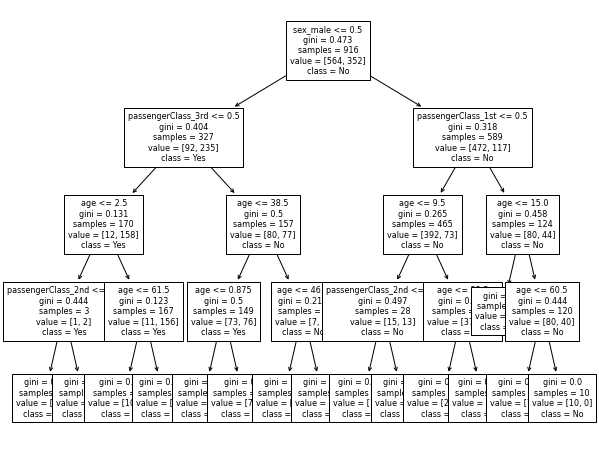

In [43]:
%matplotlib inline
plt.figure(figsize=(10,8))

plot_tree(arbre, feature_names=features_names, 
          class_names=['No','Yes'], fontsize=8)

In [44]:
print (export_text(arbre, feature_names=features_names, 
                spacing=3, decimals=2))

|--- sex_male <= 0.50
|   |--- passengerClass_3rd <= 0.50
|   |   |--- age <= 2.50
|   |   |   |--- passengerClass_2nd <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- passengerClass_2nd >  0.50
|   |   |   |   |--- class: 1
|   |   |--- age >  2.50
|   |   |   |--- age <= 61.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  61.50
|   |   |   |   |--- class: 1
|   |--- passengerClass_3rd >  0.50
|   |   |--- age <= 38.50
|   |   |   |--- age <= 0.88
|   |   |   |   |--- class: 1
|   |   |   |--- age >  0.88
|   |   |   |   |--- class: 1
|   |   |--- age >  38.50
|   |   |   |--- age <= 46.00
|   |   |   |   |--- class: 0
|   |   |   |--- age >  46.00
|   |   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- passengerClass_1st <= 0.50
|   |   |--- age <= 9.50
|   |   |   |--- passengerClass_2nd <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- passengerClass_2nd >  0.50
|   |   |   |   |--- class: 1
|   |   |--- age >  9.50
|   |   |   |--- age <= 32.50
|   |   |   

### Random Forest

On essaie maintenant de construire une forêt aléatoire avec les mêmes paramètres (max_depth) et un nombre limité d'estimators.   

In [45]:
foret = RandomForestClassifier (n_estimators=8, max_depth=max_depth)

foret.fit(X_train, Y_train)

for f,i in zip(features_names, foret.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))

 age : 0.1584 
 sex_male : 0.6346 
 passengerClass_1st : 0.0925 
 passengerClass_2nd : 0.0472 
 passengerClass_3rd : 0.0673 


In [50]:
pred_foret = foret.predict(X_test)

print (confusion_matrix (Y_test, pred_foret))

[[201  37]
 [ 45 110]]


In [51]:
print (classification_report(Y_test, pred_foret))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       238
           1       0.75      0.71      0.73       155

    accuracy                           0.79       393
   macro avg       0.78      0.78      0.78       393
weighted avg       0.79      0.79      0.79       393



In [52]:
i = 1
for tree in foret.estimators_ :
    print (i,export_text(tree, feature_names=features_names, 
                spacing=3, decimals=2))
    i += 1

1 |--- sex_male <= 0.50
|   |--- passengerClass_1st <= 0.50
|   |   |--- passengerClass_3rd <= 0.50
|   |   |   |--- age <= 56.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- age >  56.00
|   |   |   |   |--- class: 0.0
|   |   |--- passengerClass_3rd >  0.50
|   |   |   |--- age <= 1.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- age >  1.50
|   |   |   |   |--- class: 1.0
|   |--- passengerClass_1st >  0.50
|   |   |--- age <= 8.50
|   |   |   |--- class: 0.0
|   |   |--- age >  8.50
|   |   |   |--- age <= 35.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- age >  35.50
|   |   |   |   |--- class: 1.0
|--- sex_male >  0.50
|   |--- passengerClass_3rd <= 0.50
|   |   |--- age <= 12.50
|   |   |   |--- class: 1.0
|   |   |--- age >  12.50
|   |   |   |--- passengerClass_2nd <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- passengerClass_2nd >  0.50
|   |   |   |   |--- class: 0.0
|   |--- passengerClass_3rd >  0.50
|   |   |--- age <= 9.50
|   |   |   |--- age <= 0

### Comparaison
Maintenant, on va essayer de créer pour les deux algorithmes, des modèles plus performants et on va les comparer. 


In [46]:
arbre2 = DecisionTreeClassifier(max_depth=(max_depth*2))
arbre2.fit (X_train, Y_train)
pred_arbre2 = arbre2.predict (X_test)


for f,i in zip(features_names, arbre2.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))
                               

 age : 0.2028 
 sex_male : 0.5651 
 passengerClass_1st : 0.0405 
 passengerClass_2nd : 0.0126 
 passengerClass_3rd : 0.1790 


In [49]:
foret2 = RandomForestClassifier (n_estimators=50, max_depth=(max_depth*2))
foret2.fit(X_train, Y_train)
pred_foret2 = foret2.predict(X_test)

for f,i in zip(features_names, 
               foret2.feature_importances_) :
    print (" {} : {:.4f} ".format(f,i))

 age : 0.3554 
 sex_male : 0.4564 
 passengerClass_1st : 0.0775 
 passengerClass_2nd : 0.0260 
 passengerClass_3rd : 0.0846 


In [50]:
print (classification_report(Y_test, pred_arbre2))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       245
           1       0.84      0.59      0.70       148

    accuracy                           0.80       393
   macro avg       0.81      0.76      0.78       393
weighted avg       0.81      0.80      0.80       393



In [51]:
print (classification_report(Y_test, pred_foret2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       245
           1       0.78      0.70      0.74       148

    accuracy                           0.81       393
   macro avg       0.80      0.79      0.80       393
weighted avg       0.81      0.81      0.81       393



In [52]:
confusion_matrix (Y_test, pred_arbre2)

array([[228,  17],
       [ 60,  88]])

In [54]:
confusion_matrix (Y_test, pred_foret2)

array([[215,  30],
       [ 44, 104]])